In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

## Load the Dataset

In [4]:
data_df = pd.read_csv('gdrive/My Drive/ML TK42G6/Week 6/Mall_Customers.csv')
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data_df.shape

(200, 5)

In [6]:
data_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<a id="data_preprocessing"></a>
## Data Preprocessing

<a id="data_cleaning"></a>
#### 1. Data Cleaning

**Missing Values**
> There is no missing value found in data.

**Drop CustomerID Column**
> Drop columns CustomerID since it is not used.

In [8]:
data_df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [9]:
missing_data = data_df.isnull().sum().sum()
print('Total missing value in dataset is:', missing_data)

Total missing value in dataset is: 0


In [10]:
# Drop CustomerID Column
data_df = data_df.drop(columns='CustomerID')

<a id="data_transformation"></a>
#### 2. Data Transformation

In [11]:
data_df.Gender = data_df.Gender.replace({'Female': 1, 'Male': 0})

In [12]:
data_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


<a id="eda"></a>
## Exploratory Data Analysis (EDA)

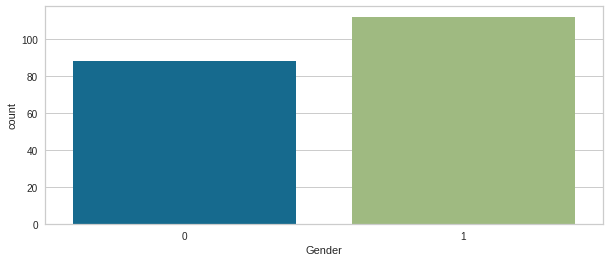

In [13]:
plt.figure(1 , figsize = (10 , 4))
sns.countplot(x = 'Gender' , data = data_df)
plt.show()

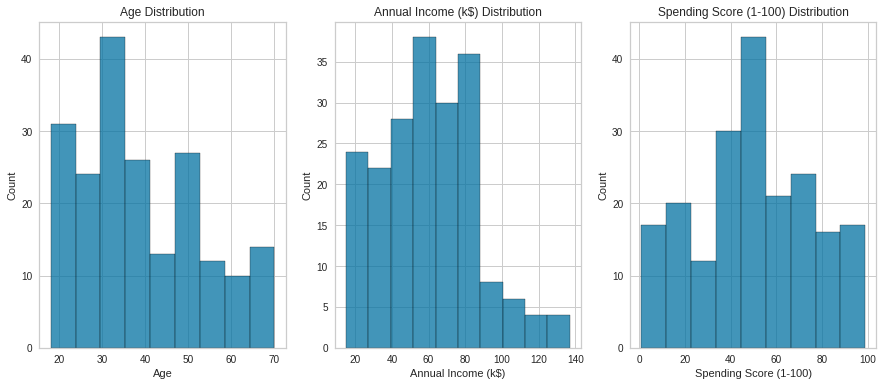

In [14]:
plt.figure(1, figsize=(15, 6))
for i, x in enumerate(['Age', 'Annual Income (k$)','Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data_df[x])
    plt.title('{} Distribution'.format(x))
plt.show()

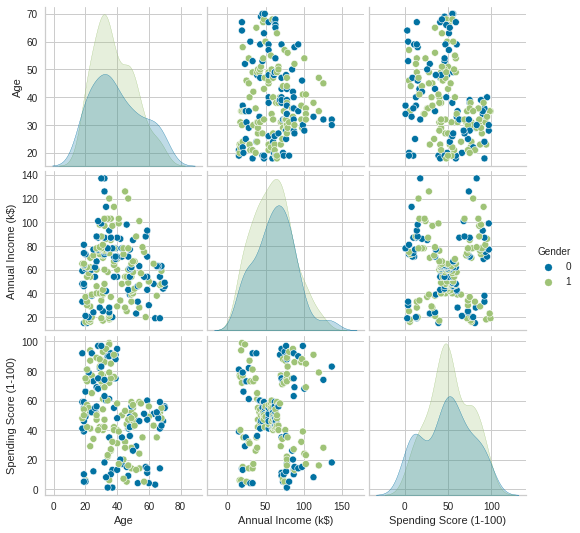

In [15]:
sns.pairplot(data_df,hue='Gender')

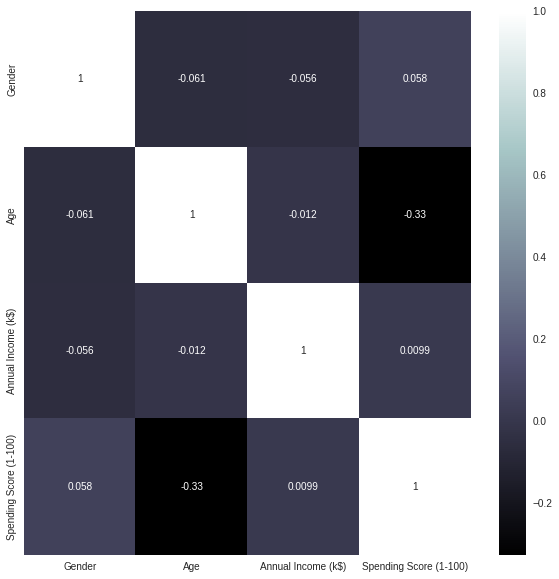

In [16]:
plt.figure(figsize = (10, 10))
sns.heatmap(data_df.corr(), annot = True, cmap="bone")
plt.savefig('Correlation')
plt.show()

<a id="clustering"></a>
## Clustering

<a id="k_means_clustering"></a>
#### 1. K-Means Clustering

In [17]:
# Slice the data exclude gender
X = data_df.iloc[:,[1,2,3]].values

In [18]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(X)

In [19]:
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [20]:
# plot 3d of 'age', 'annual income' and 'spending score', group by 5 clusters in different colours
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=y)
fig.show()

In [21]:
# plot 3d of 'age', 'annual income' and 'spending score', colour based on gender
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=data_df['Gender'])
fig.show()

<a id="hierarchical_clustering"></a>
### 6.2 Hierarchical Clustering

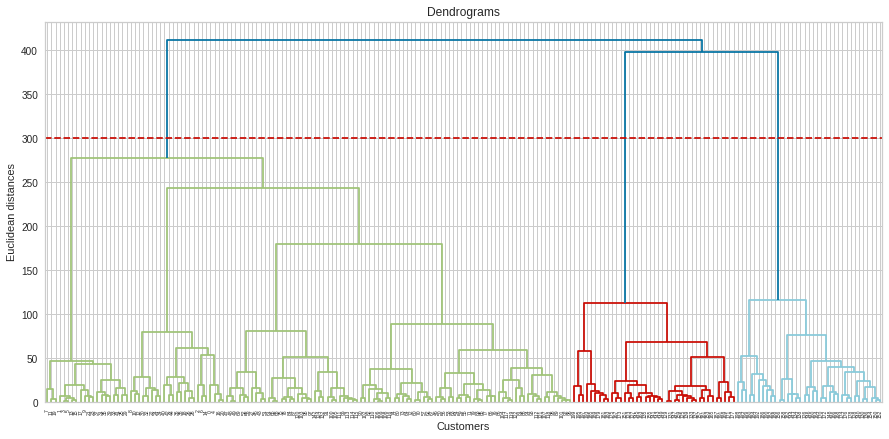

In [22]:
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=300, color='r', linestyle='--')
dend = sch.dendrogram(sch.linkage(X, method='ward'))

In [23]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [24]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
# plot 3d of 'age', 'annual income' and 'spending score', group by 5 clusters in different colours
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=y_hc)
fig.show()